# Task
Analyze a CSV dataset containing 'Sprint Speed' and 'Ammo Clips' to predict 'Survive' (1) or 'Infected' (0) using logistic regression. This includes: loading and preparing the data (converting to numpy arrays, splitting, adding bias), normalizing features (min-max or standardization), implementing the sigmoid function, calculating binary cross-entropy cost, training the model using gradient descent, visualizing the cost over iterations, implementing a prediction function, predicting the survival of a runner with '25 km/h Sprint Speed' and '1 Ammo Clip', and plotting the decision boundary. Summarize the model's performance and insights from visualizations. The input CSV file path is "survival_data.csv".

## Load and Prepare Data

### Subtask:
Load the dataset from a local CSV file path. Manually parse the CSV content to extract features (Sprint Speed, Ammo Clips) and the target variable (Survive/Infected). Convert 'Survive' to 1 and 'Infected' to 0. Convert all extracted data to numpy arrays. Manually split the data into training and testing sets, and add a bias term (intercept) to the feature matrix.


**Reasoning**:
The subtask requires loading a CSV file, manually parsing its content to extract features and the target variable, converting the target variable, converting data to numpy arrays, manually splitting into training and testing sets, and adding a bias term. This single code block will handle all these steps sequentially.



In [ ]:
import csv
import numpy as np

# Initialize lists to store data
sprint_speed = []
ammo_clips = []
survive_status = []



with open('/content/drive/MyDrive/Colab Notebooks/zombies_data - Sheet1.csv', 'r') as file:
    reader = csv.reader(file)
    header = next(reader) # Skip the header row

    # Iterate through each row and extract data
    for row in reader:
        sprint_speed.append(float(row[0]))
        ammo_clips.append(float(row[1]))
        # Convert 'Survive' to 1 and 'Infected' to 0
        survive_status.append(1 if row[2] == 'Survive' else 0)

# Convert lists to NumPy arrays
sprint_speed_np = np.array(sprint_speed)
ammo_clips_np = np.array(ammo_clips)
survive_status_np = np.array(survive_status)

# Combine features into a single feature matrix X
X = np.column_stack((sprint_speed_np, ammo_clips_np))

# Reshape target variable y into a column vector
y = survive_status_np.reshape(-1, 1)

# Determine the split point (80% for training, 20% for testing)
split_index = int(0.8 * len(X))

# Manually split the data into training and testing sets
X_train = X[:split_index]
y_train = y[:split_index]
X_test = X[split_index:]
y_test = y[split_index:]

# Add a bias term (intercept) to both X_train and X_test
X_train_biased = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test_biased = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

print("Data loading and preparation complete.")
print(f"X_train_biased shape: {X_train_biased.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test_biased shape: {X_test_biased.shape}")
print(f"y_test shape: {y_test.shape}")

Data loading and preparation complete.
X_train_biased shape: (17, 3)
y_train shape: (17, 1)
X_test_biased shape: (5, 3)
y_test shape: (5, 1)


In [ ]:
print("First 5 rows of X_train_biased:")
display(X_train_biased[:5])

print("First 5 rows of y_train:")
display(y_train[:5])

First 5 rows of X_train_biased:


array([[ 1. , 12. ,  0. ],
       [ 1. , 14.5,  1. ],
       [ 1. , 10. ,  2. ],
       [ 1. , 18. ,  0. ],
       [ 1. ,  8.5,  4. ]])

First 5 rows of y_train:


array([[0],
       [0],
       [0],
       [0],
       [0]])

# Task
Normalize 'Sprint Speed' and 'Ammo Clips' features in `X_train` and `X_test` using Min-Max Scaling, then re-create `X_train_biased` and `X_test_biased` with the scaled features and bias term, storing the scaling parameters (min and max) from the training data.

## Normalize Features (Min-Max Scaling)

### Subtask:
Apply Min-Max Scaling to 'Sprint Speed' and 'Ammo Clips' features in both `X_train` and `X_test` datasets. Store the scaling parameters (min and max for each feature) from the training data to normalize new data points for prediction. After normalization, re-create `X_train_biased` and `X_test_biased` with the normalized features and the bias term.


**Reasoning**:
The subtask requires Min-Max scaling of the features, which involves calculating min/max from the training data, applying the scaling formula to both training and test sets, and then re-adding the bias term.



In [ ]:
print(X_train.shape)
print(X_test.shape)

# Extract features from X_train for scaling parameter calculation
sprint_speed_train_data = X_train[:, 0]
ammo_clips_train_data = X_train[:, 1]

# Calculate min and max for 'Sprint Speed' from training data
min_sprint_speed_train = np.min(sprint_speed_train_data)
max_sprint_speed_train = np.max(sprint_speed_train_data)

# Calculate min and max for 'Ammo Clips' from training data
min_ammo_clips_train = np.min(ammo_clips_train_data)
max_ammo_clips_train = np.max(ammo_clips_train_data)

# Apply Min-Max scaling to 'Sprint Speed' column in X_train and X_test
X_train_normalized = np.copy(X_train).astype(float) # Create a copy to avoid modifying original X_train
X_test_normalized = np.copy(X_test).astype(float)   # Create a copy to avoid modifying original X_test

X_train_normalized[:, 0] = (X_train[:, 0] - min_sprint_speed_train) / (max_sprint_speed_train - min_sprint_speed_train)
X_test_normalized[:, 0] = (X_test[:, 0] - min_sprint_speed_train) / (max_sprint_speed_train - min_sprint_speed_train)

# Apply Min-Max scaling to 'Ammo Clips' column in X_train and X_test
X_train_normalized[:, 1] = (X_train[:, 1] - min_ammo_clips_train) / (max_ammo_clips_train - min_ammo_clips_train)
X_test_normalized[:, 1] = (X_test[:, 1] - min_ammo_clips_train) / (max_ammo_clips_train - min_ammo_clips_train)

# Re-create X_train_biased and X_test_biased with normalized features and bias term
X_train_biased = np.hstack((np.ones((X_train_normalized.shape[0], 1)), X_train_normalized))
X_test_biased = np.hstack((np.ones((X_test_normalized.shape[0], 1)), X_test_normalized))

print("Features normalized and biased matrices re-created.")
print(f"X_train_biased shape after normalization: {X_train_biased.shape}")
print(f"X_test_biased shape after normalization: {X_test_biased.shape}")


(17, 2)
(5, 2)
Features normalized and biased matrices re-created.
X_train_biased shape after normalization: (17, 3)
X_test_biased shape after normalization: (5, 3)


## Implement Sigmoid Function

### Subtask:
Define a Python function that computes the sigmoid activation: `1 / (1 + exp(-z))` using NumPy.


**Reasoning**:
The subtask requires defining a Python function for the sigmoid activation using NumPy, as described in the instructions. This code block directly implements that function.



In [ ]:
import numpy as np

def sigmoid(z):
    """
    Computes the sigmoid activation function.

    Args:
        z (np.ndarray or float): Input to the sigmoid function.

    Returns:
        np.ndarray or float: Sigmoid of z.
    """
    return 1 / (1 + np.exp(-z))

print("Sigmoid function defined successfully.")

Sigmoid function defined successfully.


## Implement Binary Cross-Entropy Cost Function

### Subtask:
Define a Python function to calculate the binary cross-entropy (log-loss) cost for logistic regression, given predictions and true labels.


**Reasoning**:
The subtask requires defining a Python function for the binary cross-entropy cost using NumPy, as described in the instructions. This code block directly implements that function.



In [ ]:
def compute_cost(h, y):
    """
    Computes the binary cross-entropy cost function.

    Args:
        h (np.ndarray): Predicted probabilities (output of sigmoid function).
        y (np.ndarray): True labels (0 or 1).

    Returns:
        float: The calculated binary cross-entropy cost.
    """
    m = len(y) # Number of training examples
    cost = (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

print("Binary cross-entropy cost function defined successfully.")

Binary cross-entropy cost function defined successfully.


## Implement Gradient Descent Algorithm

### Subtask:
Implement the gradient descent algorithm to iteratively update the model's weights (theta). This function will calculate gradients, adjust weights, and store the cost at each iteration to monitor convergence.


**Reasoning**:
The subtask requires defining a Python function for the gradient descent algorithm, which calculates gradients, updates weights, and tracks the cost over iterations. This code block directly implements that function based on the provided instructions.



In [ ]:
def gradient_descent(X, y, theta, alpha, iterations):
    """
    Performs gradient descent to learn theta.

    Args:
        X (np.ndarray): The feature matrix (with bias term).
        y (np.ndarray): The true labels.
        theta (np.ndarray): Initial weights.
        alpha (float): The learning rate.
        iterations (int): The number of iterations to run gradient descent.

    Returns:
        tuple: A tuple containing:
            - theta (np.ndarray): The optimized weights.
            - cost_history (list): A list of cost values at each iteration.
    """
    m = len(y) # Number of training examples
    cost_history = []

    for i in range(iterations):
        # Calculate predicted probabilities
        h = sigmoid(X @ theta)

        # Calculate the error
        error = h - y

        # Calculate the gradient
        gradient = (1 / m) * X.T @ error

        # Update weights
        theta = theta - alpha * gradient

        # Calculate and store the cost
        cost = compute_cost(h, y)
        cost_history.append(cost)

    return theta, cost_history

print("Gradient descent function defined successfully.")

Gradient descent function defined successfully.


## Train the Logistic Regression Model

### Subtask:
Initialize the model's weights (theta) and set hyperparameters such as the learning rate and the number of iterations. Then, train the logistic regression model using the `X_train_biased` and `y_train` datasets by running the implemented gradient descent function.


**Reasoning**:
The subtask requires initializing model weights, setting hyperparameters, and training the logistic regression model using the `gradient_descent` function. This code block will perform all these steps.



In [ ]:
import numpy as np

# 1. Initialize theta (weights) as a NumPy array of zeros
# The number of features in X_train_biased is X_train_biased.shape[1]
initial_theta = np.zeros((X_train_biased.shape[1], 1))

# 2. Set the learning rate (alpha)
alpha = 0.01

# 3. Set the number of iterations
iterations = 10000

# 4. Call the gradient_descent function
theta, cost_history = gradient_descent(X_train_biased, y_train, initial_theta, alpha, iterations)

print("Model training complete.")
print(f"Optimized theta: {theta.flatten()}")
print(f"Final cost: {cost_history[-1]:.4f}")

Model training complete.
Optimized theta: [-3.91400807 -1.40088833 -1.14641814]
Final cost: 0.0086


## Visualize Cost Over Iterations

### Subtask:
Plot the cost calculated at each iteration during the model training process using `matplotlib`. This visualization will help in assessing the convergence of the gradient descent algorithm.


**Reasoning**:
The subtask requires visualizing the cost over iterations. This will involve importing matplotlib, creating a plot of the `cost_history` against the iteration number, adding appropriate labels and title, and then displaying it.



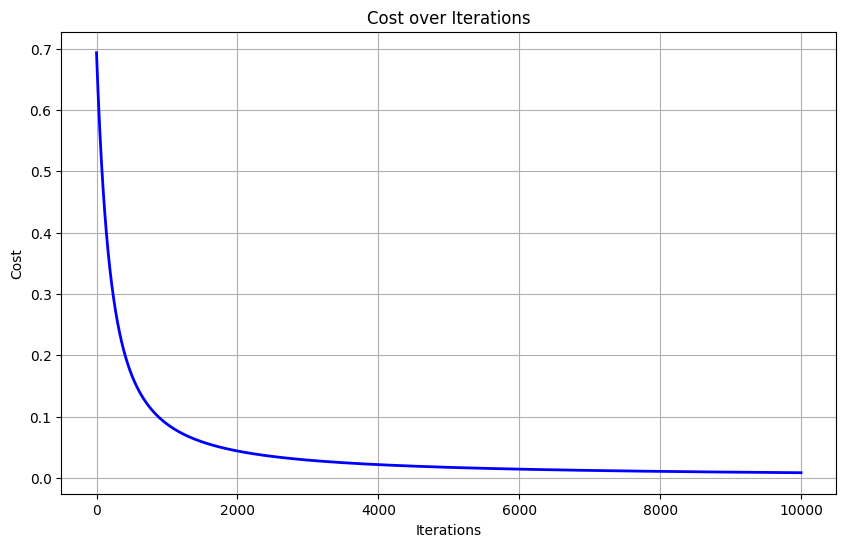

Cost history plot generated.


In [ ]:
import matplotlib.pyplot as plt

# Create a figure and an axes object
plt.figure(figsize=(10, 6))

# Plot the cost history
plt.plot(range(len(cost_history)), cost_history, color='blue', linewidth=2)

# Add title and labels
plt.title('Cost over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')

# Display the plot
plt.grid(True)
plt.show()

print("Cost history plot generated.")

## Implement Prediction Function

### Subtask:
Create a function that takes normalized features (with bias) and the trained weights (theta) to calculate the survival probability and predict the final class (0 for Infected, 1 for Survive).


**Reasoning**:
The subtask requires defining a Python function that calculates survival probabilities and predicts classes (0 or 1) based on normalized features and trained weights using the previously defined sigmoid function.



In [ ]:
def predict(X, theta):
    """
    Calculates survival probabilities and predicts the final class.

    Args:
        X (np.ndarray): Feature matrix (normalized and with bias term).
        theta (np.ndarray): Trained weights.

    Returns:
        tuple: A tuple containing:
            - probabilities (np.ndarray): Predicted probabilities.
            - predictions (np.ndarray): Predicted classes (0 or 1).
    """
    # Calculate predicted probabilities using the sigmoid function
    probabilities = sigmoid(X @ theta)

    # Classify predictions: >= 0.5 for Survive (1), < 0.5 for Infected (0)
    predictions = np.where(probabilities >= 0.5, 1, 0)

    return probabilities, predictions

print("Prediction function defined successfully.")

Prediction function defined successfully.


## Predict for a Specific Runner

### Subtask:
Predict the survival status (probability and class) for a new runner with '25 km/h Sprint Speed' and '1 Ammo Clip'. Remember to normalize these specific inputs using the same parameters used for the training data and add a bias term before making the prediction.


**Reasoning**:
The subtask requires defining a new runner's features, normalizing them using the previously stored min/max values from the training data, adding a bias term, and then using the `predict` function to get the survival probability and class. This code block will perform all these steps as instructed.



In [ ]:
import numpy as np

# 1. Define a NumPy array for the new runner's features
new_runner_features = np.array([25, 1]) # [Sprint Speed, Ammo Clips]

# 2. Normalize the 'Sprint Speed' of the new runner
normalized_sprint_speed = (new_runner_features[0] - min_sprint_speed_train) / (max_sprint_speed_train - min_sprint_speed_train)

# 3. Normalize the 'Ammo Clips' of the new runner
normalized_ammo_clips = (new_runner_features[1] - min_ammo_clips_train) / (max_ammo_clips_train - min_ammo_clips_train)

# 4. Create a new NumPy array with the normalized features
normalized_new_runner = np.array([normalized_sprint_speed, normalized_ammo_clips]).reshape(1, -1)

# 5. Add a bias term (a 1) to the beginning of the normalized features array
biased_new_runner = np.hstack((np.ones((normalized_new_runner.shape[0], 1)), normalized_new_runner))

# 6. Use the predict function with this biased and normalized input and the trained theta
predicted_probability, predicted_class = predict(biased_new_runner, theta)

# 7. Print the predicted survival probability and the predicted class
print(f"New runner's Sprint Speed: {new_runner_features[0]} km/h, Ammo Clips: {new_runner_features[1]}")
print(f"Predicted survival probability: {predicted_probability[0][0]:.4f}")
print(f"Predicted class: {predicted_class[0][0]} ({'Survive' if predicted_class[0][0] == 1 else 'Infected'})")


New runner's Sprint Speed: 25 km/h, Ammo Clips: 1
Predicted survival probability: 0.0050
Predicted class: 0 (Infected)


## Visualize Decision Boundary

### Subtask:
Generate a 2D plot showing the normalized 'Sprint Speed' and 'Ammo Clips' features for the training data, with points colored by their actual class (Survive/Infected). Overlay the decision boundary learned by the logistic regression model on this plot. Ensure legends are provided.


**Reasoning**:
The subtask requires generating a 2D plot of the training data with the decision boundary. This involves plotting the normalized features, creating a meshgrid, predicting probabilities over the meshgrid, and then contouring the 0.5 probability line to represent the decision boundary. All these steps are consolidated into a single code block to produce the visualization.



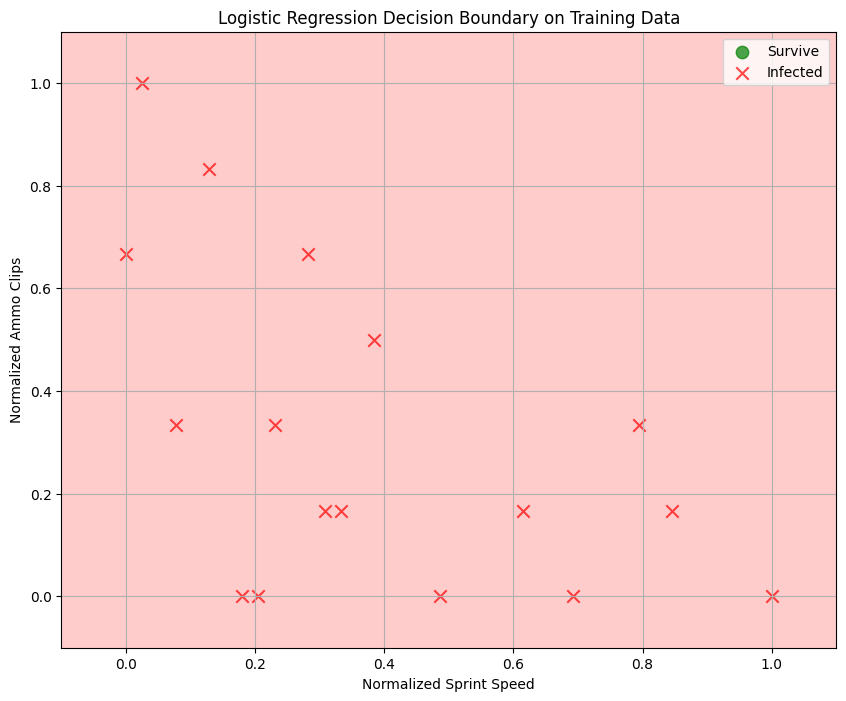

Decision boundary plot generated successfully.


In [ ]:
import matplotlib.pyplot as plt

# 1. Set up the plot
plt.figure(figsize=(10, 8))

# 2. Create a scatter plot of the training data
# Separate classes for plotting
survived = X_train_normalized[y_train.flatten() == 1]
infected = X_train_normalized[y_train.flatten() == 0]

plt.scatter(survived[:, 0], survived[:, 1], color='green', marker='o', label='Survive', s=80, alpha=0.7)
plt.scatter(infected[:, 0], infected[:, 1], color='red', marker='x', label='Infected', s=80, alpha=0.7)

# 3. Define the meshgrid for the decision boundary
# Get the min and max values for each normalized feature from X_train_normalized
x_min, x_max = X_train_normalized[:, 0].min() - 0.1, X_train_normalized[:, 0].max() + 0.1
y_min, y_max = X_train_normalized[:, 1].min() - 0.1, X_train_normalized[:, 1].max() + 0.1

# Create a meshgrid of points
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# 4. Prepare meshgrid for prediction
# Flatten the meshgrid points and add a bias term
X_plot = np.c_[xx.ravel(), yy.ravel()]
X_plot_biased = np.hstack((np.ones((X_plot.shape[0], 1)), X_plot))

# 5. Predict probabilities over the meshgrid
# Use the predict function (which includes sigmoid) to get probabilities
probabilities_meshgrid, _ = predict(X_plot_biased, theta)
Z = probabilities_meshgrid.reshape(xx.shape)

# 6. Plot the decision boundary
plt.contour(xx, yy, Z, levels=[0.5], colors='blue', linestyles='--', linewidths=2)
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.2, colors=['red', 'green'])


# 7. Add plot enhancements
plt.title('Logistic Regression Decision Boundary on Training Data')
plt.xlabel('Normalized Sprint Speed')
plt.ylabel('Normalized Ammo Clips')
plt.legend(loc='upper right')
plt.grid(True)

# 8. Display the plot
plt.show()

print("Decision boundary plot generated successfully.")